# LEAD_SCORING_CASE_STUDY
## Leads Conversion Using Logistic Regression


#### You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Goals of the Case Study
### There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Results Expected
1. A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
2. The word document filled with solutions to all the problems.
3. The overall approach of the analysis in a presentation.
    - Mention the problem statement and the analysis approach briefly 
    - Explain the results in business terms
    - Include visualisations and summarise the most important results in the presentation
4. A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

In [2]:
#Installing Package
# !pip install plotly

# Steps to Perform.
0. Import Packages.
1. Reading Dataset.
2. Basic Information.
3. Handling Missing Values
4. EDA : Exploratory Data Analysis
5. Outlier Detection and Capping.
6. Features Selection Based on correlation and Select K method.
7. Model Selection and Training. 



## Step 1: Import Packages


In [3]:
#supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
## Step 0: Import packages
### Step 0.1 Plackages for basic data manuplation.
import pandas as pd ## Pandas packages for data manuplation and using DataFrames.
import numpy as np ## For some mathmetical or matrics manuplation.

### Step 0.2: Ploting Libraries
import matplotlib.pyplot as plt ## For EDA or ploting Graphs
import seaborn as sns ## For EDA or ploting advance graphs.
import plotly.express as px ## For EDA or advance plots.

In [5]:
# setting the max row & columns display to 130
pd.set_option("display.max_columns",130)
pd.set_option("display.max_rows",130)

## Step 1. Reading Dataset

In [6]:
## Step 1. Reading Datasets in dataframe
PATH  = "./Leads.csv"
df = pd.read_csv(PATH)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

## Observations
1. As we can see that is a defines as a uniquely identfier of each row. We will drop this as it will not be much usefull for getting inferences and train better quality ML model. 

## Step 2. Basic Data Manuplation.

In [7]:
## Step 2.1 Shape of dataset.
num_rows = f"No. of rows: {df.shape[0]}"
num_cols = f"No. of cols: {df.shape[1]}"
dimentation = f"{num_rows} x {num_cols}"
print("<-----------------------Shape of dataset--------------------------->")
print(dimentation)

<-----------------------Shape of dataset--------------------------->
No. of rows: 9240 x No. of cols: 37


In [8]:
## Step 2.2 Data type info about the datasets.
df.info()   ## This method prints the dtypes info and the no of cols and row in datasets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Observations
1. Here 30 columns are Object these are the majority column data types. Also 4 float64 and 3 int64 columns are also there.
2. Also Our Target Column "Converted" is a int64 dtype. 

In [9]:
## Step 2.3 Num of null values in each col.
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Observations
1. Here some columns has more then half entries as Null or None, in the cleaning process we will discard all of these columns.
2. We will include all of these columns that has null value percentage less then 5%.
3. Also in the problem statement some of the columns has categorical value name "Select", This value is here because the form that users filed has select with not required so, where users did not feel any data point that data point will marks "Select"
4. First we will count this value in all categorical columns and select the columns based on decided ratio.

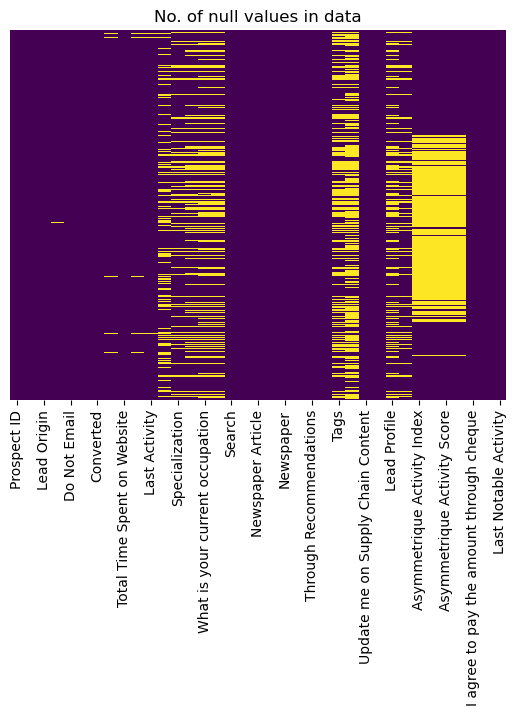

In [10]:
# Step : 2.4 Ploting heat map for null values for application data.
sns.heatmap(df.isnull(),yticklabels = False, cbar= False, cmap = "viridis").set_title("No. of null values in data");

## Observations
1. Here Yellow lines show the missing values higher the yello lines, higher the missing values. 

In [11]:
#Step 2.5 Checking for Nan values percentage on application dataset
def check_percentage(df, cols  =  None, thresh =  0):
    """
    returns the missing val column list and print the percentage missing values in each column.
    Args:
        df(pandas.dataframe): Pandas dataframe. 
    Returns:
        missing_val_col(List): List of columns names that has missing values.
    """
    missing_val_col,count,sum_null = [],0,df.isna().sum()
    if(cols == None):
        cols = df.columns
    for col in cols:
        pct = df[col].isna().mean() * 100
        if(sum_null[col]!=0 and pct > thresh):
            count+=1
            missing_val_col.append(col)
            print(f"{col} : {sum_null[col]} => {round(pct, 2)}%")
    print()
    print("No. Of Columns: ", count)
    return missing_val_col

# function calling    
drop_columns = check_percentage(df,thresh=5)

Country : 2461 => 26.63%
Specialization : 1438 => 15.56%
How did you hear about X Education : 2207 => 23.89%
What is your current occupation : 2690 => 29.11%
What matters most to you in choosing a course : 2709 => 29.32%
Tags : 3353 => 36.29%
Lead Quality : 4767 => 51.59%
Lead Profile : 2709 => 29.32%
City : 1420 => 15.37%
Asymmetrique Activity Index : 4218 => 45.65%
Asymmetrique Profile Index : 4218 => 45.65%
Asymmetrique Activity Score : 4218 => 45.65%
Asymmetrique Profile Score : 4218 => 45.65%

No. Of Columns:  13


## Observations
1. Here 13 columns has higher missing value from thresh hold of 5. Need to drop these columns.
2. Also we will drop the  Prospect ID column as we discussed that is no use in further analysis

## Step 3 Handling Missing Values

### Step 3.1 Droping Missing Values

In [12]:
# Step 3.1.1 Dropping those columns that has more then 5% missing values.
drop_columns.append("Prospect ID")  ## Including the prospect id.
df.drop(drop_columns, axis=1, inplace= True)

#Step: 3.1.2 Shape of Data Frame.
## Step 2.1 Shape of dataset.
num_rows = f"No. of rows: {df.shape[0]}"
num_cols = f"No. of cols: {df.shape[1]}"
dimentation = f"{num_rows} x {num_cols}"
print("<-----------------------Shape of dataset After Droping Null Values columns--------------------------->")
print(dimentation)

<-----------------------Shape of dataset After Droping Null Values columns--------------------------->
No. of rows: 9240 x No. of cols: 23


In [13]:
# Step 3.2.1 replacing nan values to a cat features nan values.
cat_feature_nan = [col for col in df.columns if df[col].dtype == 'O']
cat_feature_nan
def replacing_nan_val(dataset, feature_nan):
    data= dataset.copy()
    data[feature_nan] = data[feature_nan].fillna("Empty")
    return data


## Calling the features.
missing_value = check_percentage(df,cat_feature_nan)
df = replacing_nan_val(df,missing_value)

Lead Source : 36 => 0.39%
Last Activity : 103 => 1.11%

No. Of Columns:  2


## Observations
1. Here only two categorical columns that has missing values. 
2. We replaced Missing values to a new category Empty.

In [14]:
# Step 3.2.2 Replaceing nan values to numerical values.
numerical_features_nan = [col for col in df.columns if df[col].dtype != 'O']

def replace_value(dataset, feature_nan):
    data= dataset.copy()
    data[feature_nan] = data[feature_nan].fillna(data[feature_nan].mean())
    return data

# Calling function.
numerical_value_nan = check_percentage(df, numerical_features_nan)
df =  replace_value(df,numerical_value_nan)

TotalVisits : 137 => 1.48%
Page Views Per Visit : 137 => 1.48%

No. Of Columns:  2


## Observations
1. Here two columns has missing values so we replaced with mode value of each columns.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Last Activity                             9240 non-null   object 
 10  Search                              

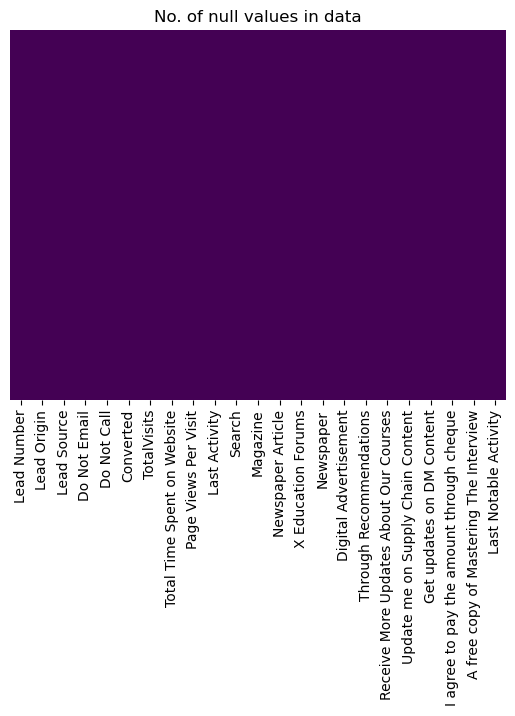

In [16]:
# Step 3.3 Checking the null values.
sns.heatmap(df.isnull(),yticklabels = False, cbar= False, cmap = "viridis").set_title("No. of null values in data");

## Inference:
1. All the null null imputed. for categorical col we replace the values with new category and for numerical col we replaced with mean value.

## Step 4. EDA: Exploratry Data Analysis

In [17]:
## Step 4.1 Basic Descerete Statistic Analysis on Application dataset.
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9240.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.818723                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.362820  
std                2.145333  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

## Observations
1. Here 5 columns are Numerical columns. 
2. Out of 5 four columns has minimum value zero.
3. Converted column that is our target column  has 50% Zero values that means there much more percentage of people that not converted. 

In [18]:
## Our Target column is Converted
TARGET_COLUMN = "Converted"


## Extracting the categorical columns.
CAT_COLS = [col for col in df if df[col].dtype =='O']

## Extracting the numerical columns.
NUM_COLS  = [col for col in df if df[col].dtype != 'O']

## No. of categorical columns and numerical columns.
print(f"No. of categorical columns : {len(CAT_COLS)}")
print(f"No. of numerical columns   : {len(NUM_COLS)}")

No. of categorical columns : 18
No. of numerical columns   : 5


In [19]:
## Step 4.2 Plotting the target column distribution.
def plot_target_distribution(dataframe, target_col_name):
    """
    Plot a count plot of the distribution of the target column.

    Parameters:
        dataframe (pandas.DataFrame): DataFrame containing the data.
        target_col_name (str): Name of the target column in the DataFrame.

    Returns:
        None
    """
    target_col = dataframe[target_col_name]
    fig = px.histogram(target_col,
                       labels={'value': target_col_name},
                       title=f"Distribution of {target_col_name}",
                       marginal='violin',
                       color_discrete_sequence=['green'])
    fig.update_layout(
        xaxis_title_text=f'{target_col_name}',
        yaxis_title_text='Count',
        bargap=0.2,
        showlegend=False
    )
    fig.show()

## Ploting count plot of target variable to see the distribution of two target category
plot_target_distribution(df,TARGET_COLUMN)

## Observation
1. As we earlier predicted that Target column has higher number of 0 values then 1. We have more negative examples in our training then positive. 

In [20]:
## Step 4.3 Bivariate Analysis with Categorical columns.
# Step 4.3.1 No. of classes in categorical columns.
df[CAT_COLS].nunique()

Lead Origin                                  5
Lead Source                                 22
Do Not Email                                 2
Do Not Call                                  2
Last Activity                               18
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Update me on Supply Chain Content            1
Get updates on DM Content                    1
I agree to pay the amount through cheque     1
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

## Observations
1. Here most of the categorical columns has 2 categories.
2. Lead Source that seems to be an sources from where we get the leads of customers is 21 that is highest categories among all the columns.

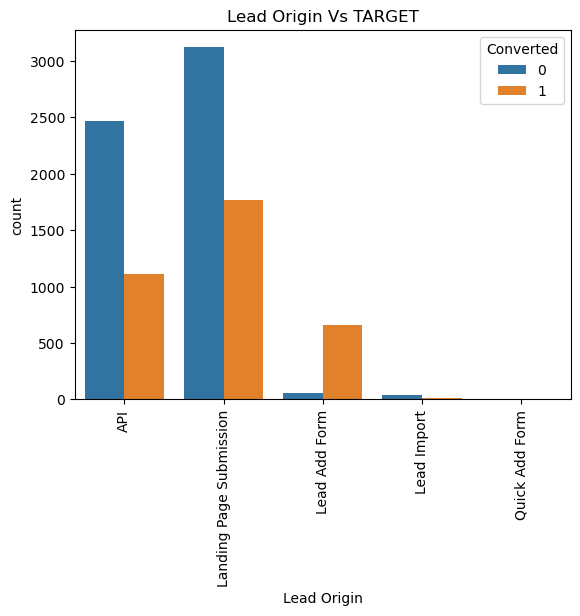

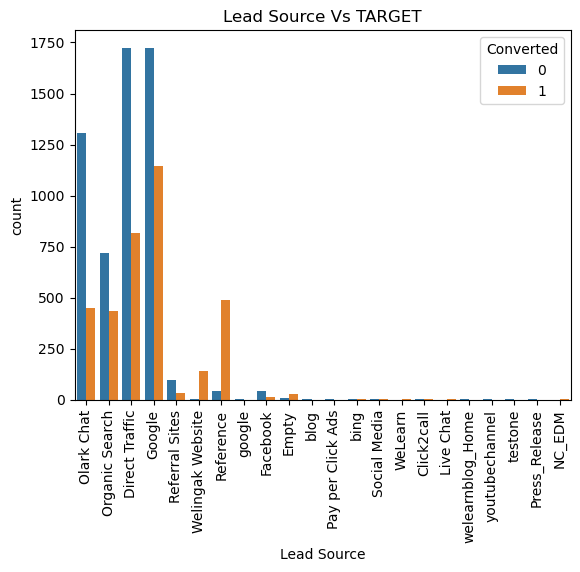

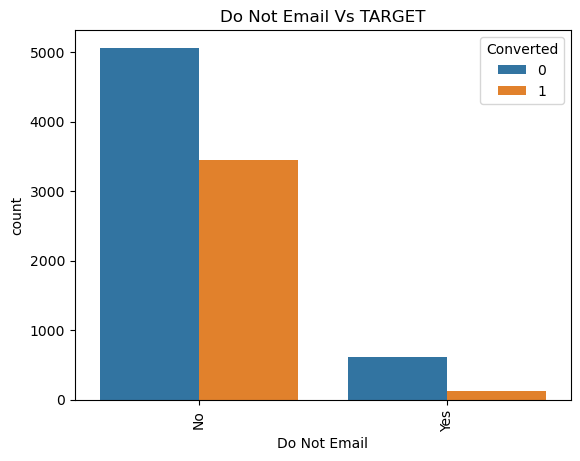

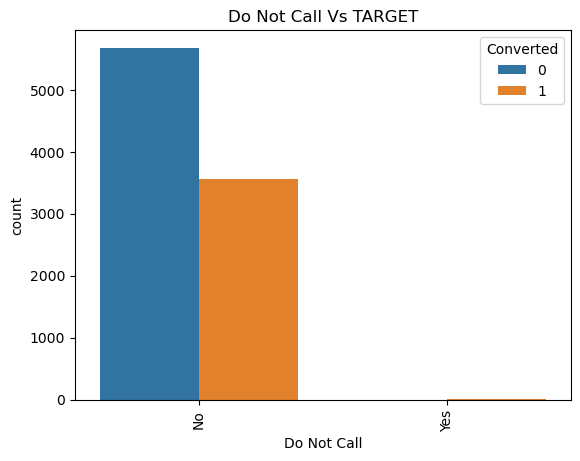

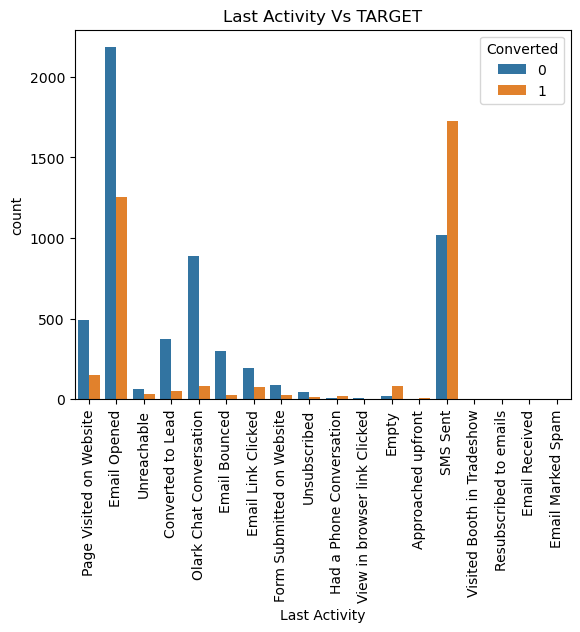

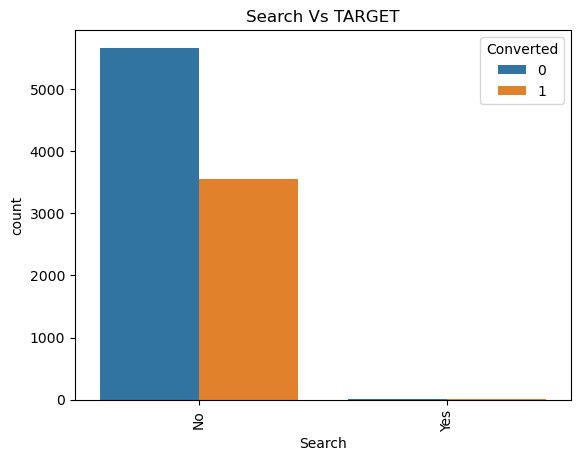

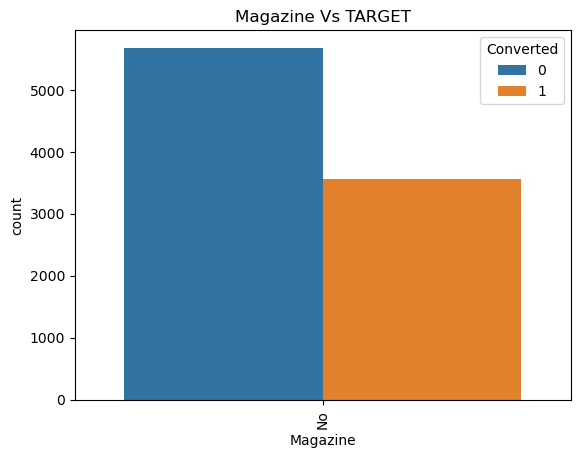

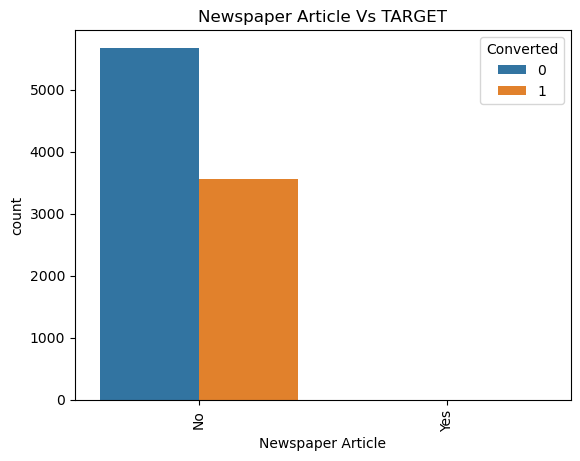

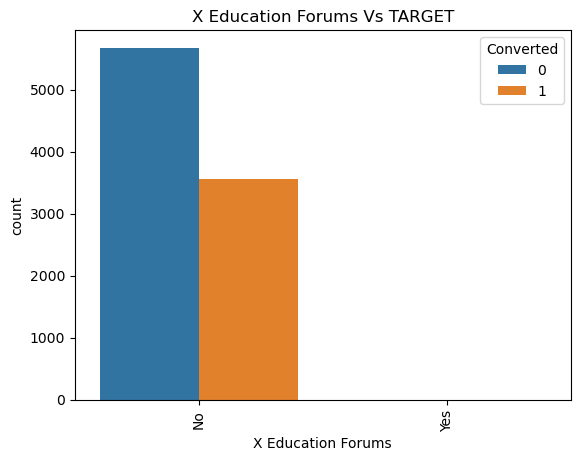

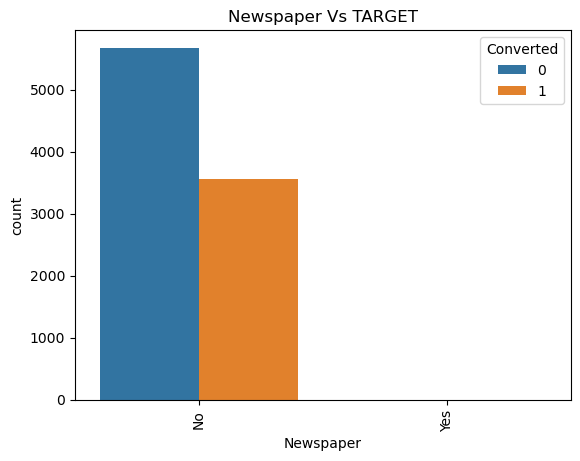

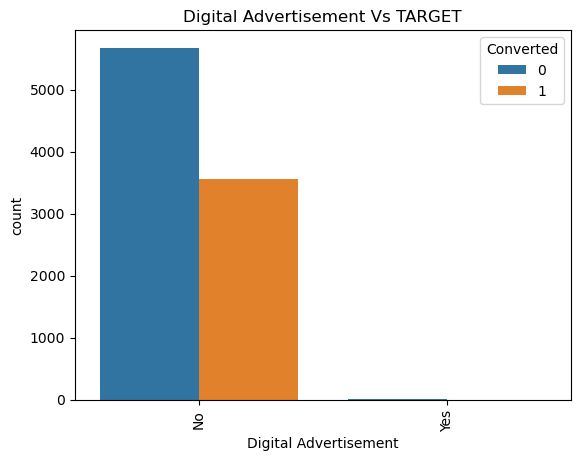

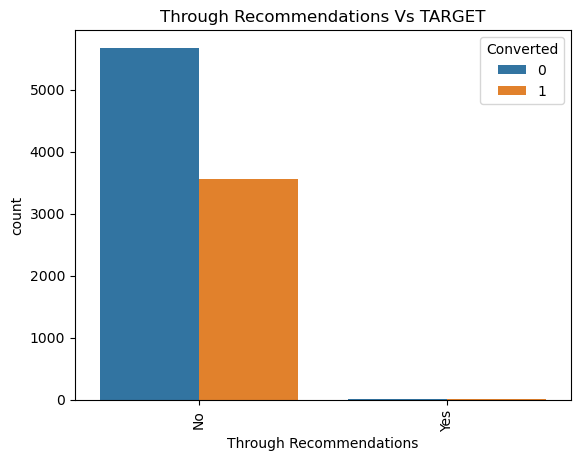

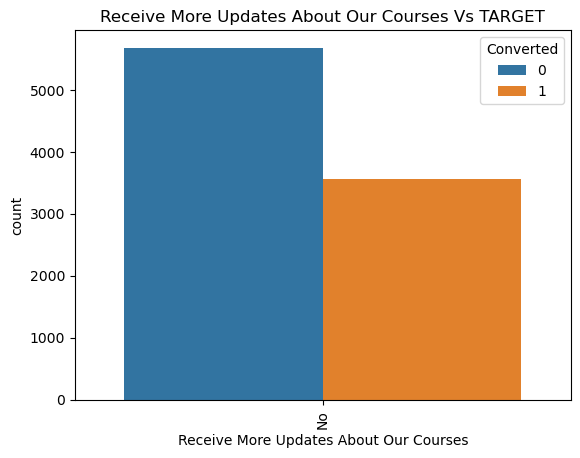

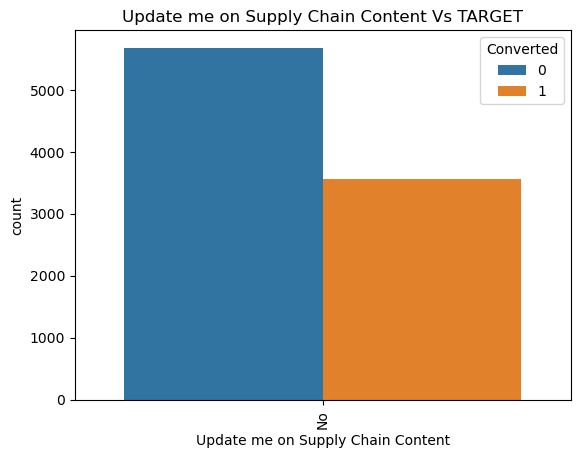

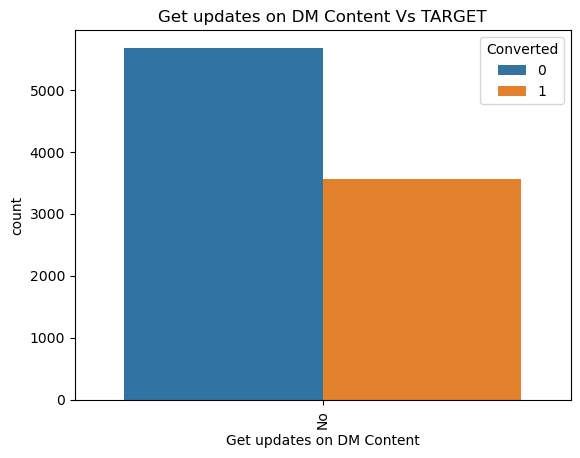

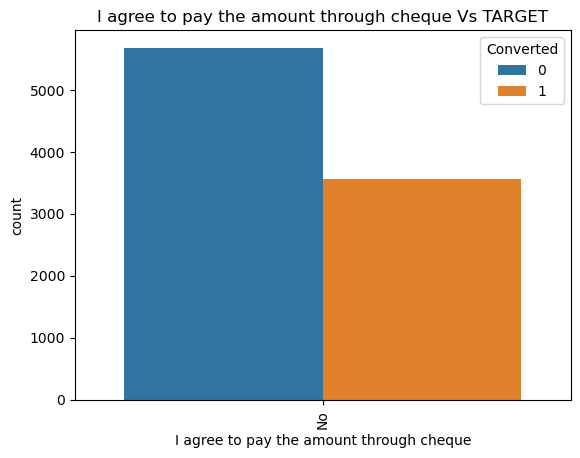

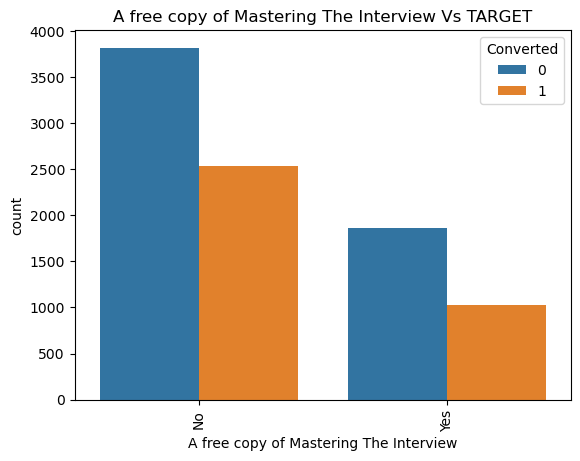

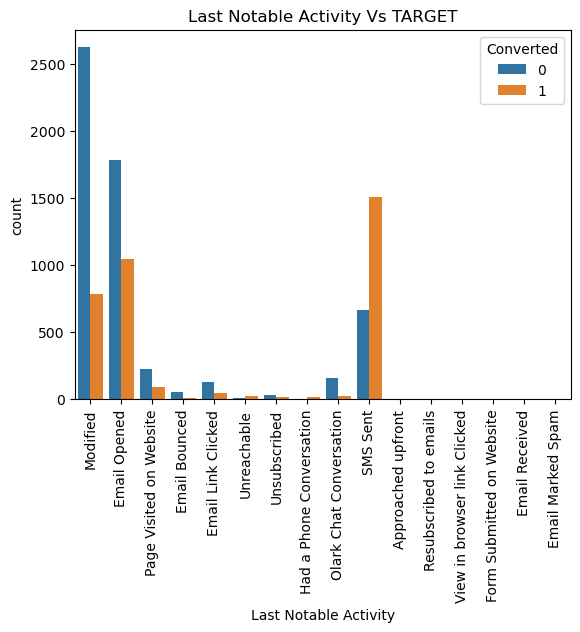

In [21]:
# Step 4.4` we will be using transformation
for feature in CAT_COLS:
    if(0 in df[feature].unique()):
        pass
    else:
        #trying to log normal transformation
        sns.countplot(x=feature, hue=TARGET_COLUMN, data=df)
        plt.title(f"{feature} Vs TARGET")
        plt.xticks(rotation=90)  # Rotate x-labels by 90 degrees
        plt.show()


## Observations
1. Here some categories has higher number of value then others in a single column. 
2. higher number categories supports to not  conversion and less number of categories suuport conversion. 
3. Like in Last Notable Activity if we sent the SMS then chance of convertion is higher. 
4. Also if a source is references then there is higher chance of conversion of that person. 
5. Olark chat conversion has higher negetive impact on the conversion. So, we need the inchance the bot response.

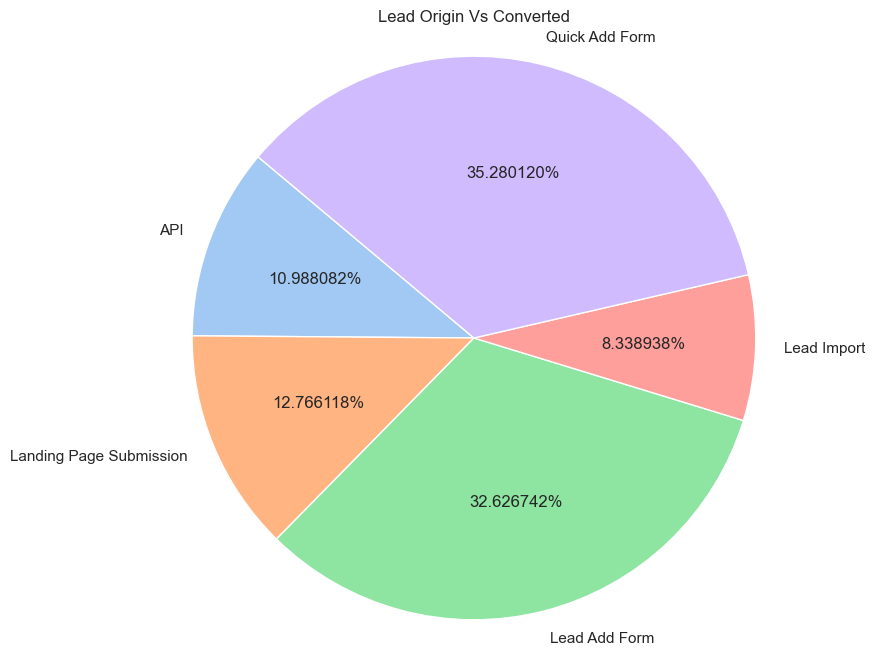

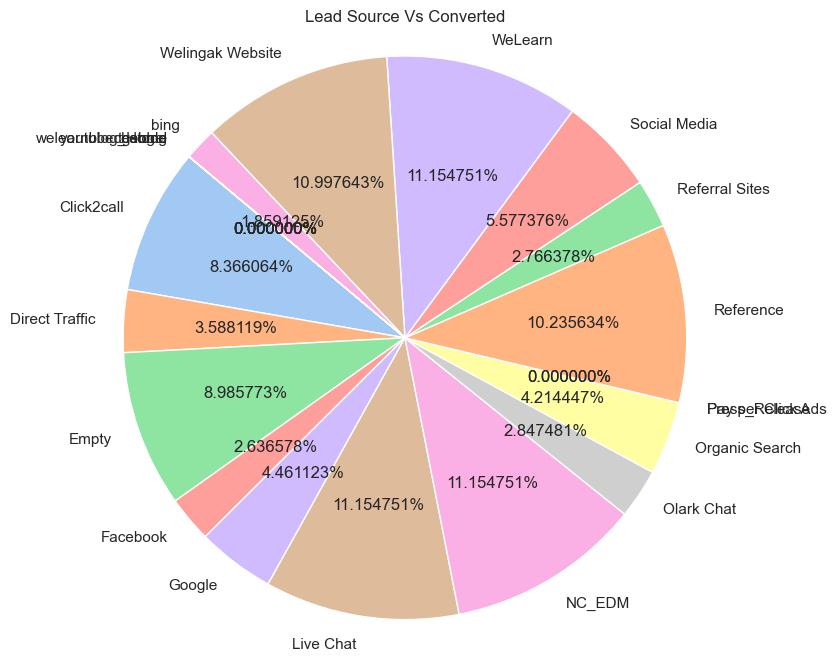

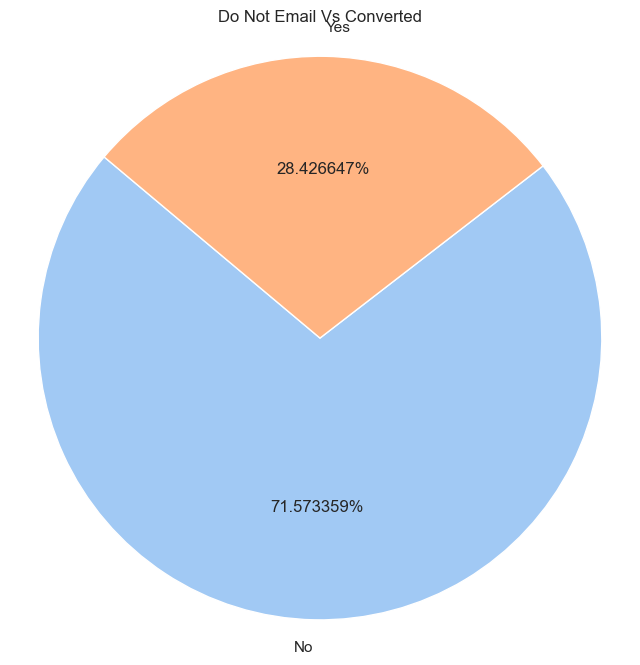

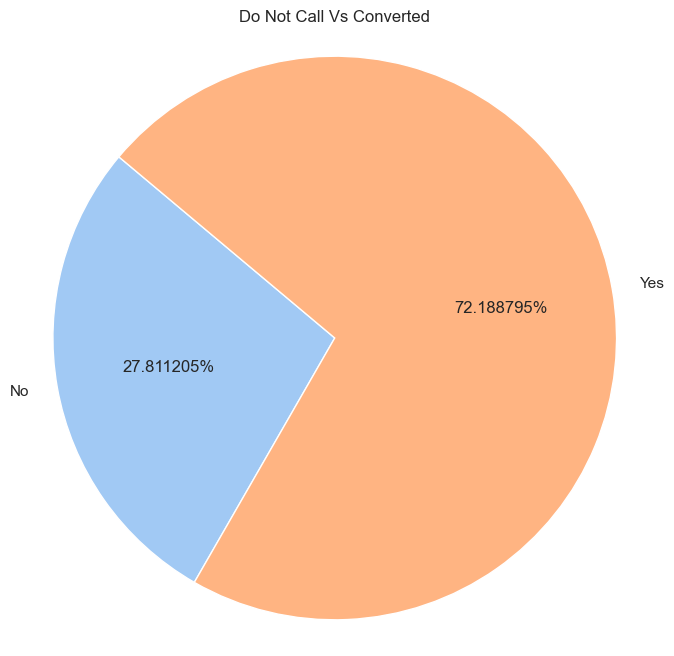

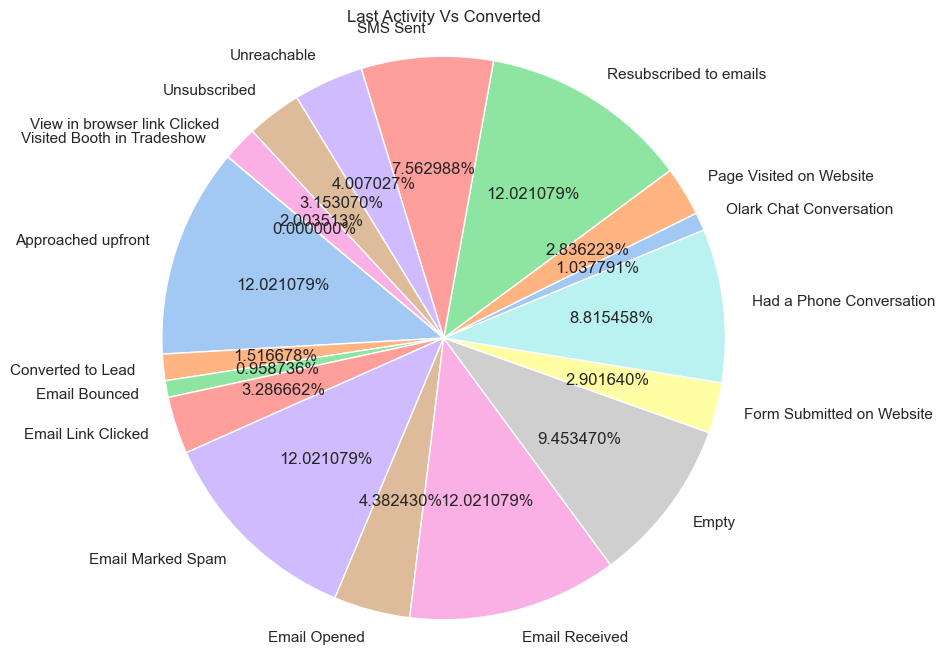

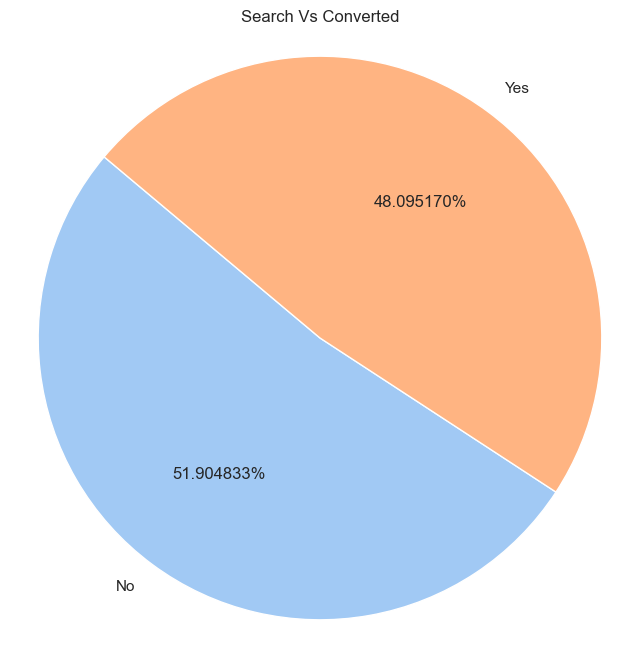

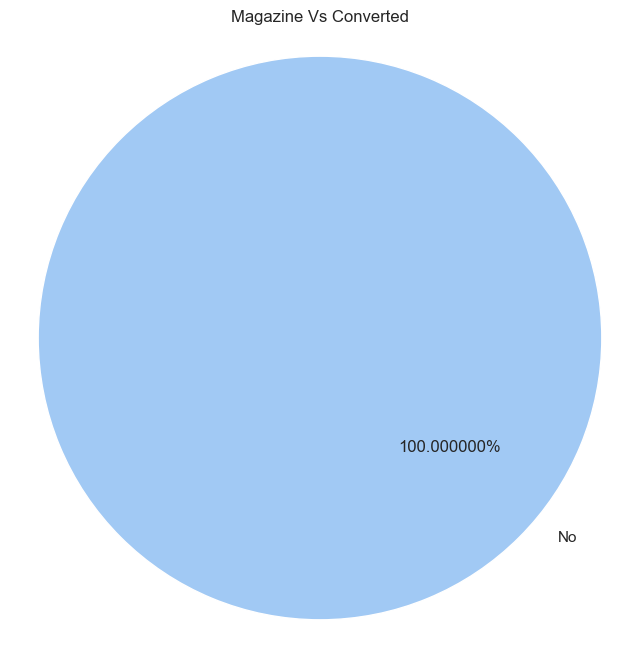

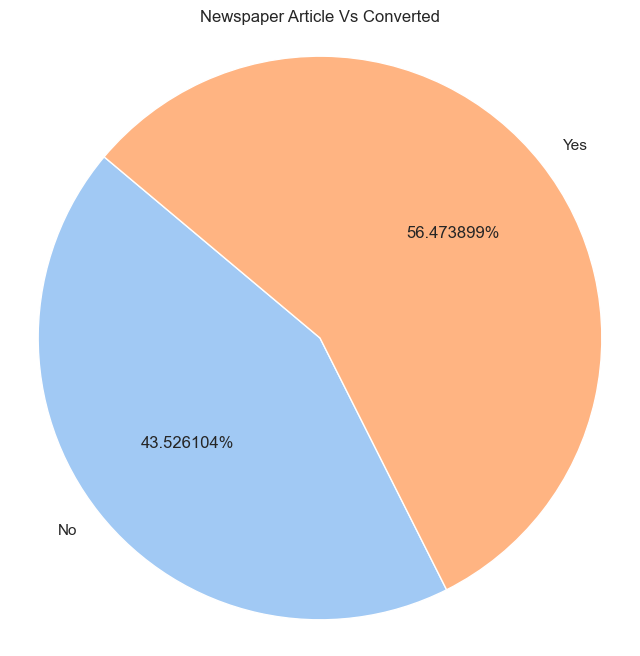

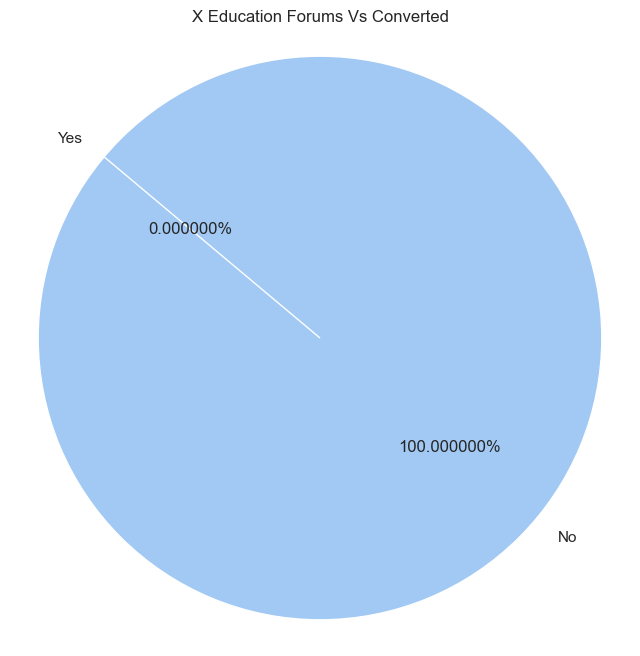

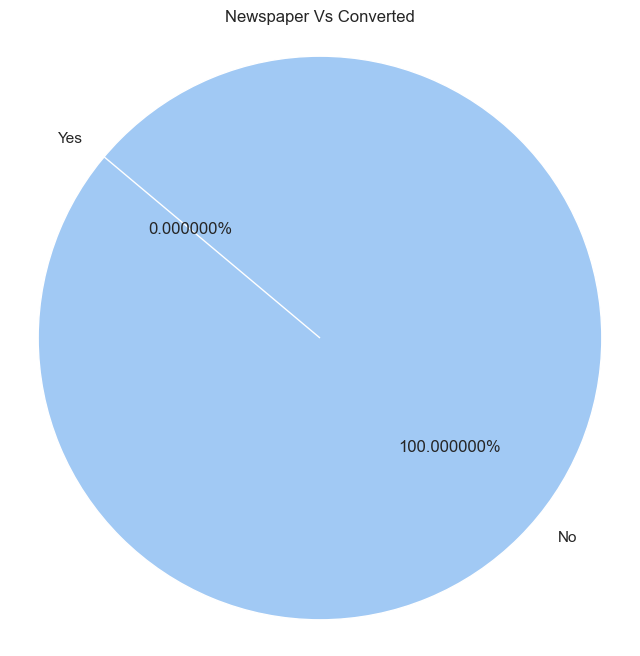

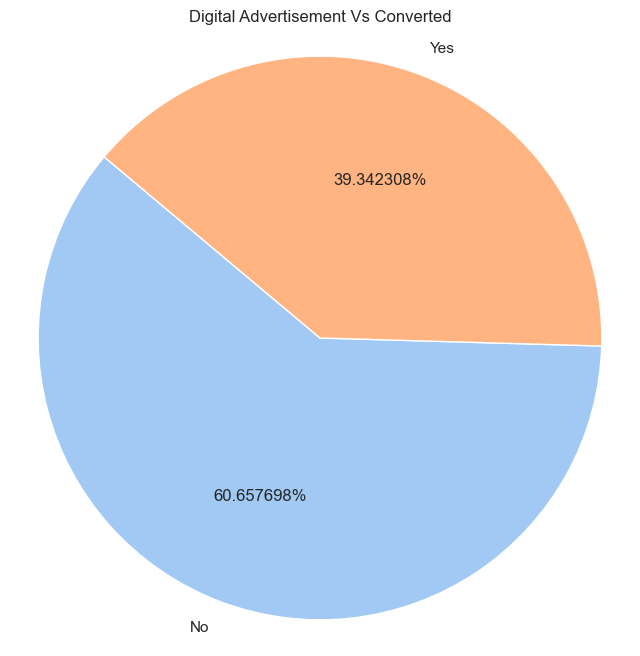

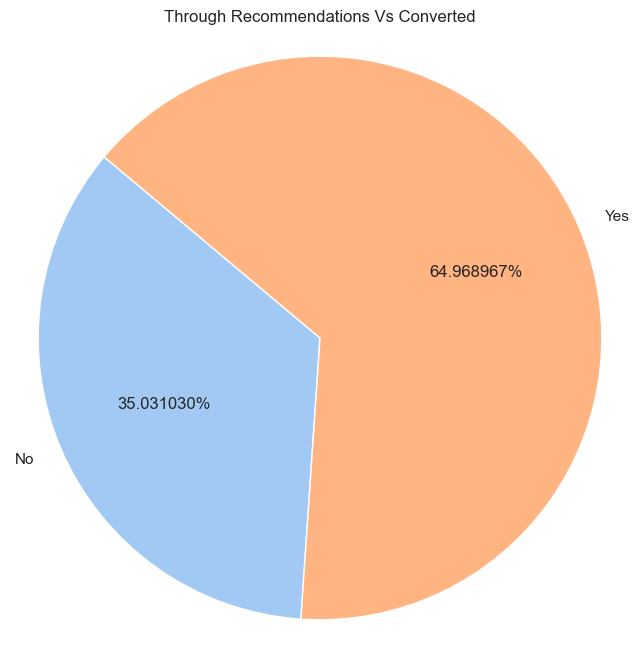

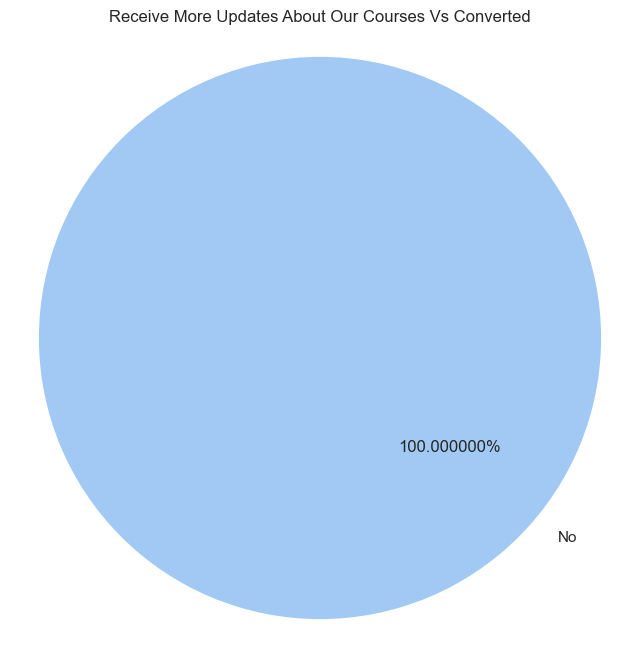

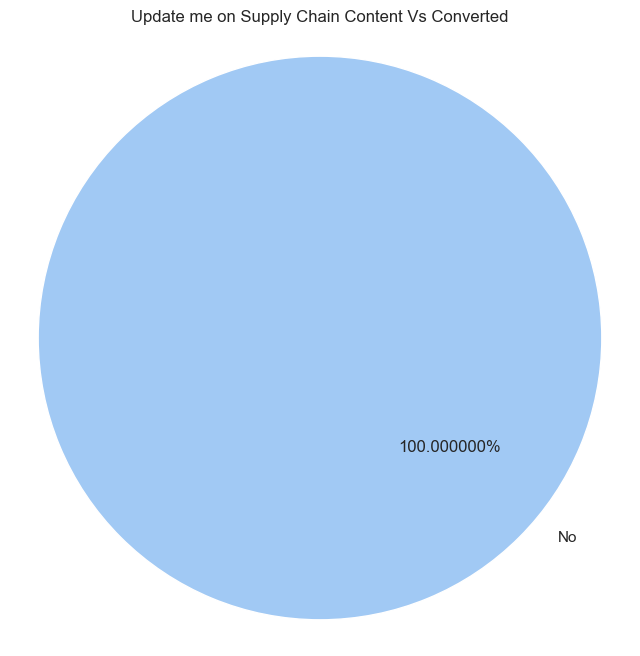

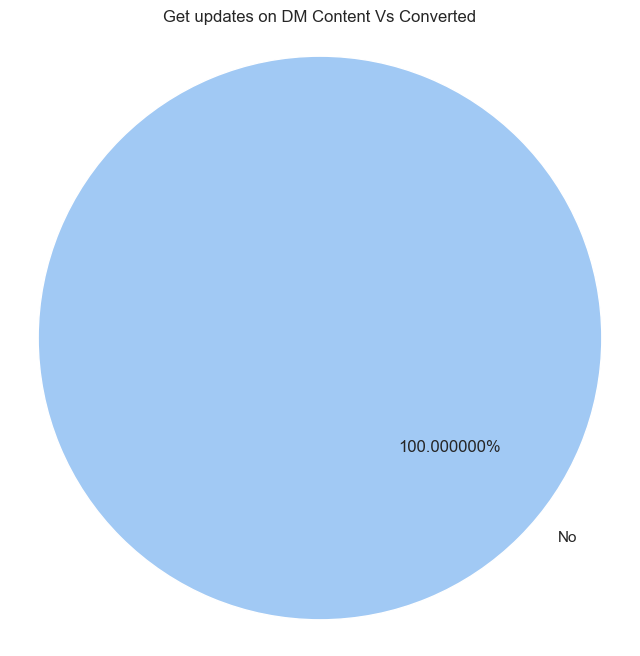

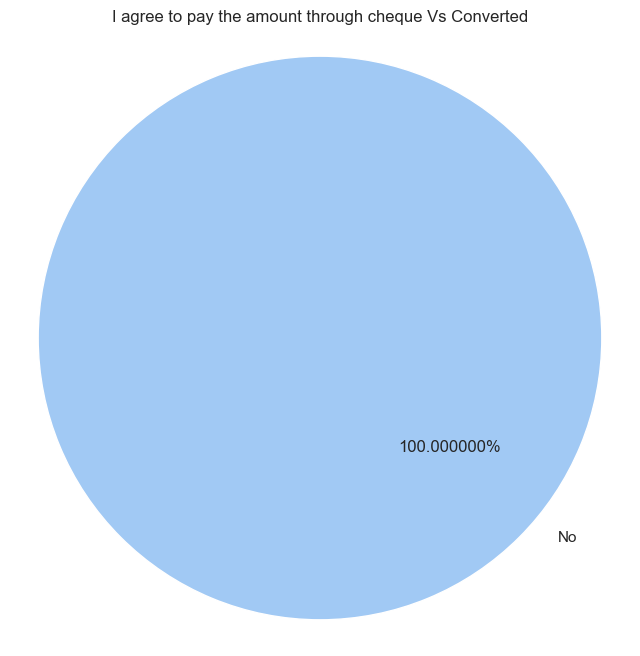

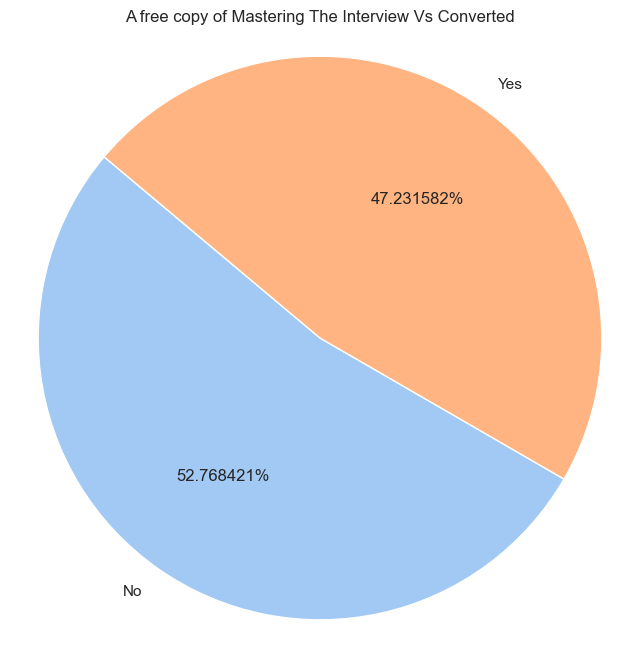

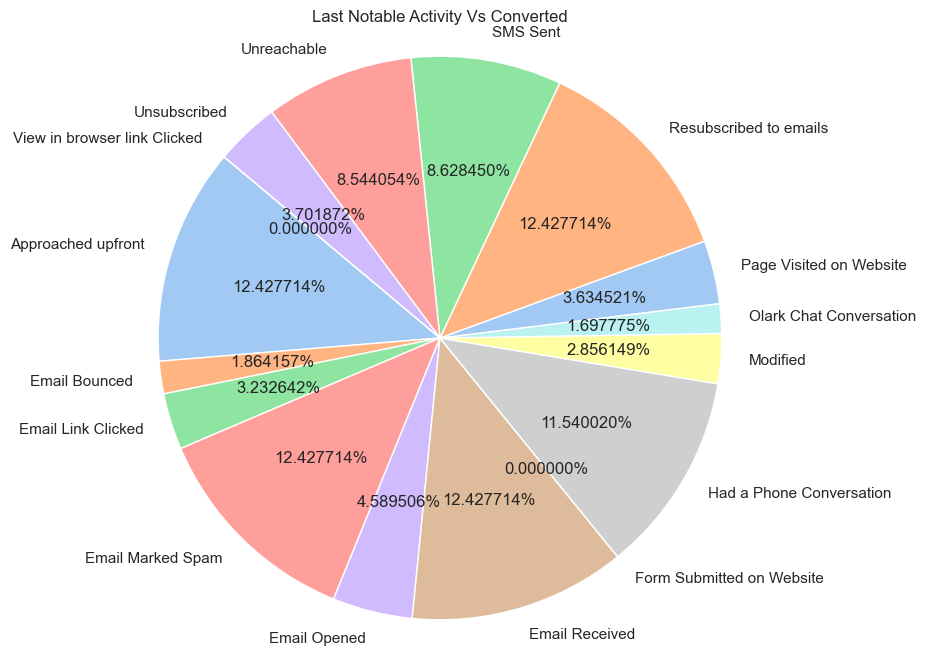

In [22]:
for feature in CAT_COLS:
    gp_df = df.groupby(feature).mean(TARGET_COLUMN)
    #trying to log normal transformation
    sns.set(style="whitegrid")  # Optional: Set the style
    plt.figure(figsize=(8, 8))
    sns.set_palette("pastel")  # Optional: Set the color palette

    # Plot the pie chart
    plt.pie(gp_df[TARGET_COLUMN].values, labels=gp_df[TARGET_COLUMN].index, autopct='%1f%%', startangle=140)

    # Set the aspect ratio to be equal for a circular pie chart
    plt.axis('equal')

    # Show the plot
    plt.title(f'{feature} Vs {TARGET_COLUMN}')
    plt.show()

## Observation
1. As we can see that some the categorical columns contribute 100% to not conversion. 
2. Also some of the cat cols like Do not email. Do not call has higher number of negetive corelation to conversion. 
3. Also references or new paper articles are the effective sources till now.

In [23]:
## Step 4.5 Bivariate on Numerical columns

DESCERETE_NUM_COL = [col for col in NUM_COLS if len(df[col].unique()) < 25]
CONTINUOUS_NUM_COL = [col for col in NUM_COLS if col not in DESCERETE_NUM_COL]
print(f"Descerete Numerical Cols :{len(DESCERETE_NUM_COL)} : Continuous Numerical Cols : {len(CONTINUOUS_NUM_COL)}")


Descerete Numerical Cols :1 : Continuous Numerical Cols : 4


## Observations
1. Here number of column is No descerete columns are 1 and continuous cols are 15 

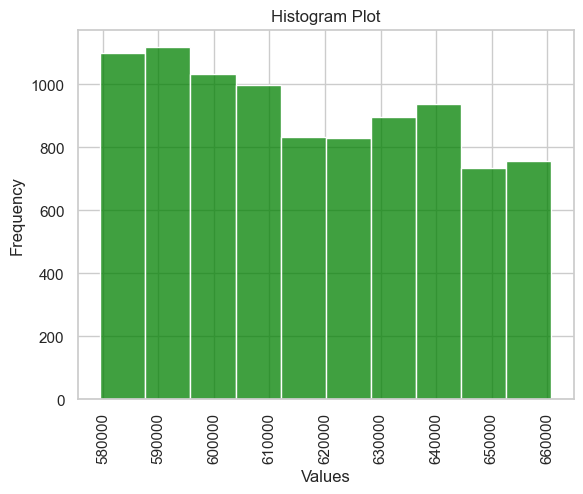

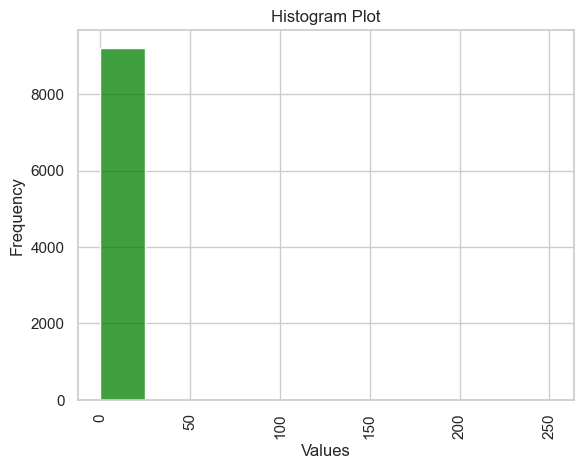

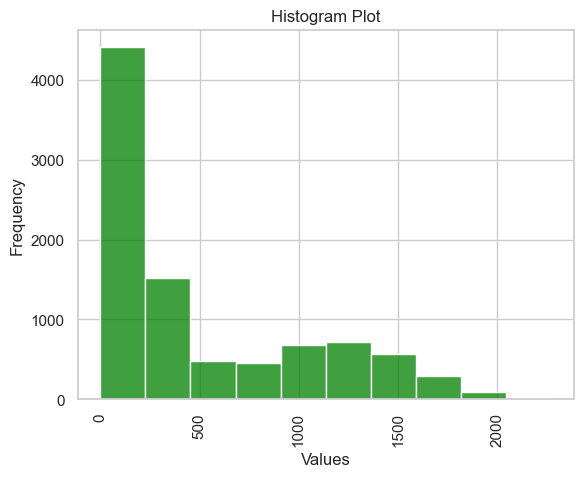

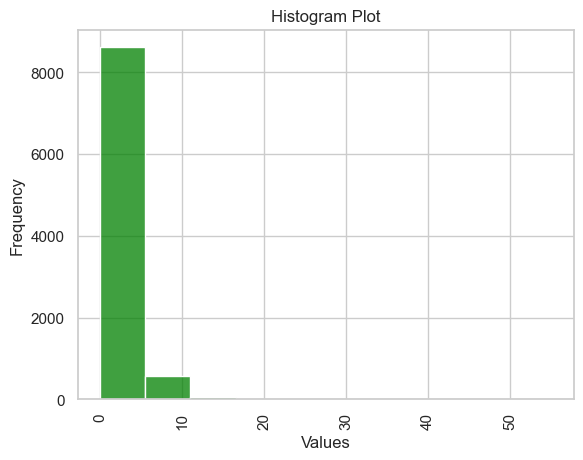

In [24]:
## Step :4.6  Univariate analysis of continuous numerical columns.
# Create a histogram plot for a specific column
for feature in CONTINUOUS_NUM_COL:
    sns.histplot(data=df, x=feature, bins=10, kde=False, color='green')
    # Set plot labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram Plot')
    plt.xticks(rotation=90)  # Rotate x-labels by 90 degrees
    # Show the plot
    plt.show()

## Observations:
1. Distributionof these continuous numerical columns are not normalized these are left skewed. Also Some of then have outliers because of these we can see the barr at one side and one single value on other side.

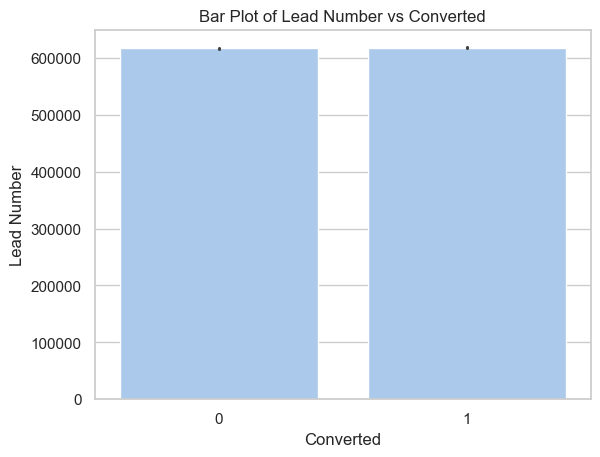

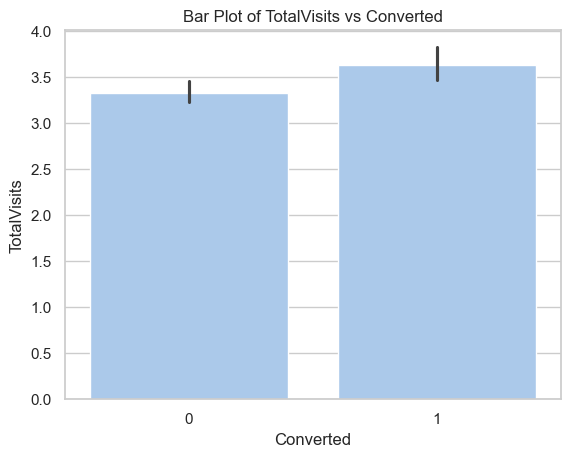

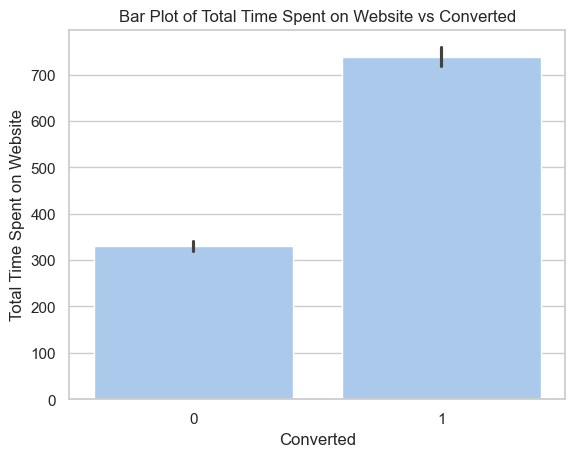

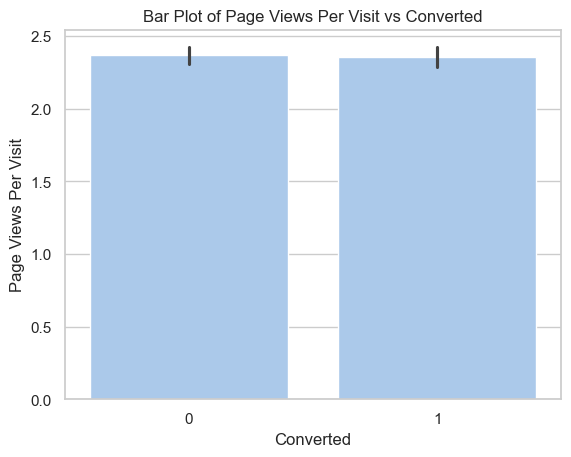

In [25]:
## Bivariate analysis of descerete variable.
for feature in CONTINUOUS_NUM_COL:
    # Create a bar plot
    sns.barplot(x=TARGET_COLUMN, y=feature, data=df)

    # Set plot labels and title
    plt.xlabel(f'{TARGET_COLUMN}')
    plt.ylabel(f'{feature}')
    plt.title(f'Bar Plot of {feature} vs {TARGET_COLUMN}')
    # Show the plot
    plt.show()

## Observations
1. Here we can see that time spent and TotalVisit on website has higher potitive impact on conversion
2. And page views has netural impact on the conversion.

## Step 5: Outlier detection 

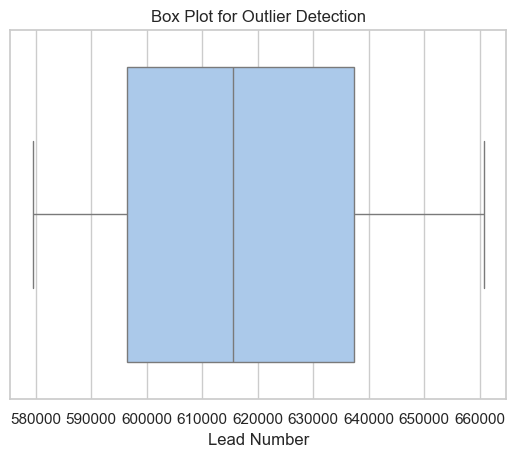

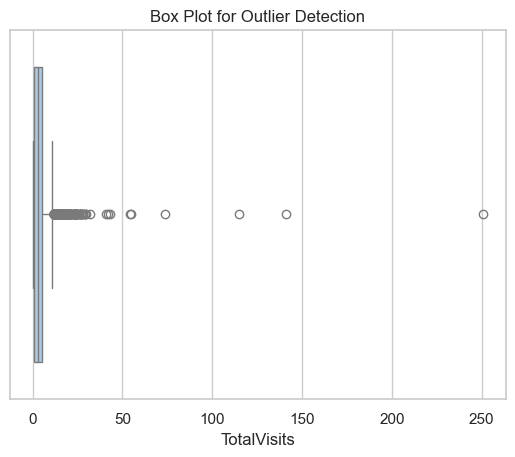

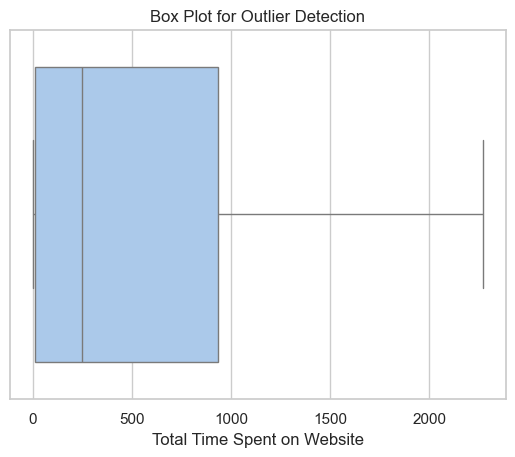

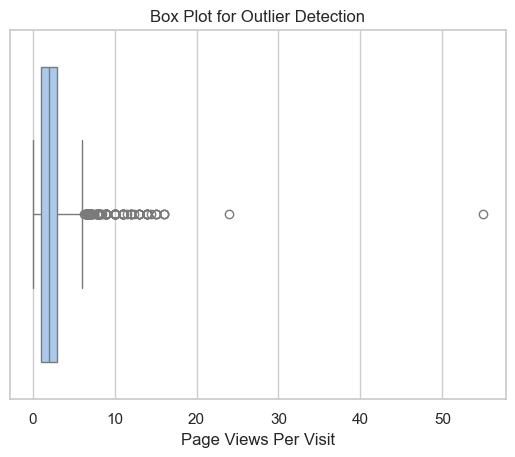

In [26]:
## Step 5.1: Checking is their any outliers or not.
## Step 5.1.1: Box plot for outlier detection.
for feature in CONTINUOUS_NUM_COL:
    # Create a box plot
    sns.boxplot(x=df[feature])

    # Set plot labels and title
    plt.xlabel(f'{feature}')
    plt.title('Box Plot for Outlier Detection')

    # Show the plot
    plt.show()

## Observations
1. In total visits and page views per visit has outliers. 
2. Removing outliers does not solve the problem we need to cap the outlier that means if some day total visit per page goes higher then a threshold then we will cap this with thresh value for better results from the model.

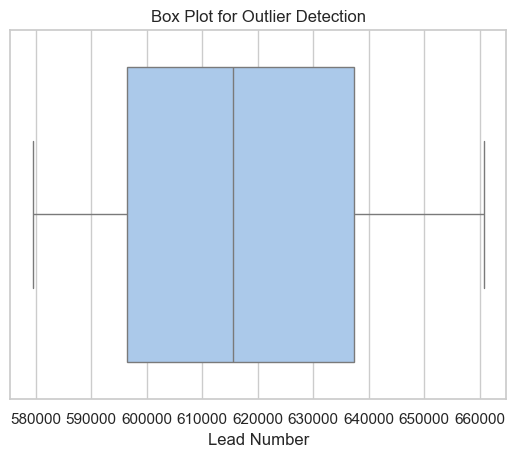

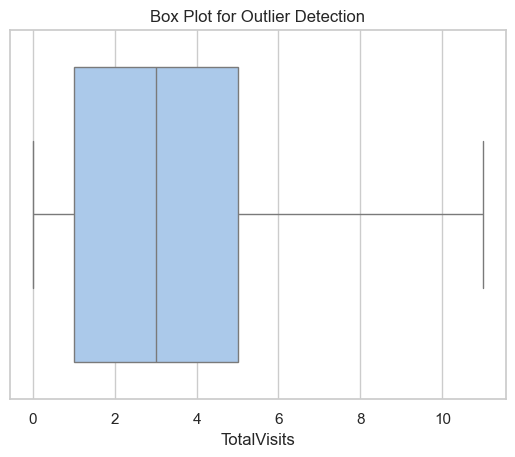

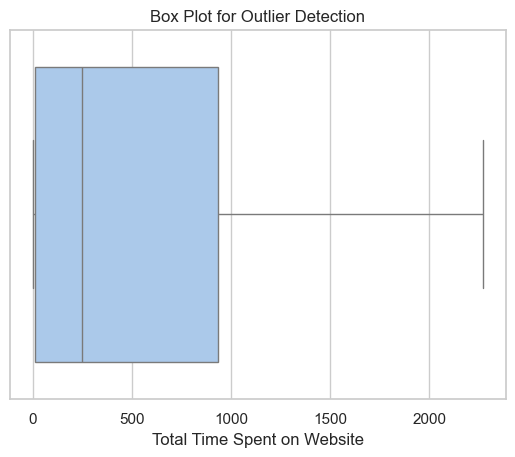

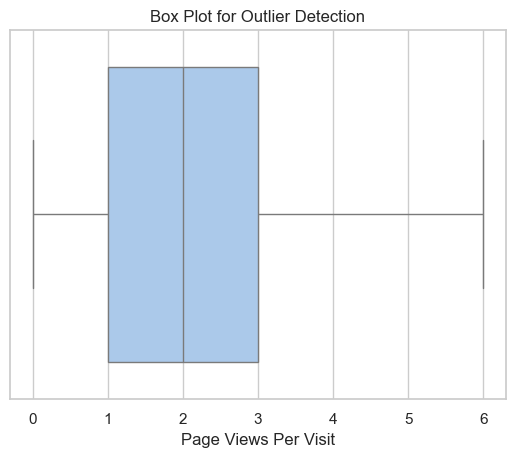

In [27]:
## Step 5.2.1: using z-index method where  we use iqr to detect the outler then we cap the outlier value.
def handle_outlier(df,features):
    for feature in features:
        percentile25 = df[feature].quantile(0.25)
        percentile75 = df[feature].quantile(0.75)
        iqr  = percentile75 - percentile25
        upper_limit = percentile75 + (1.5)*iqr
        lower_limit = percentile25 - (1.5)*iqr
        if(upper_limit >0):
            # df = df[df[feature]< upper_limit]
            # df = df[df[feature]>lower_limit]
            df[feature] = df[feature].apply(lambda x : x if x < upper_limit else upper_limit)
            df[feature] = df[feature].apply(lambda x : x if x> lower_limit else lower_limit)
    return df

df = handle_outlier(df,CONTINUOUS_NUM_COL)

## Step 5.2.2 checking the after effect of outlier capping.
for feature in CONTINUOUS_NUM_COL:
    # Create a box plot
    sns.boxplot(x=df[feature])

    # Set plot labels and title
    plt.xlabel(f'{feature}')
    plt.title('Box Plot for Outlier Detection')

    # Show the plot
    plt.show()

## Observations
1. Now there is not outliers, we cap the outliers using z-index method. where we cap the outlier between IQR range. 


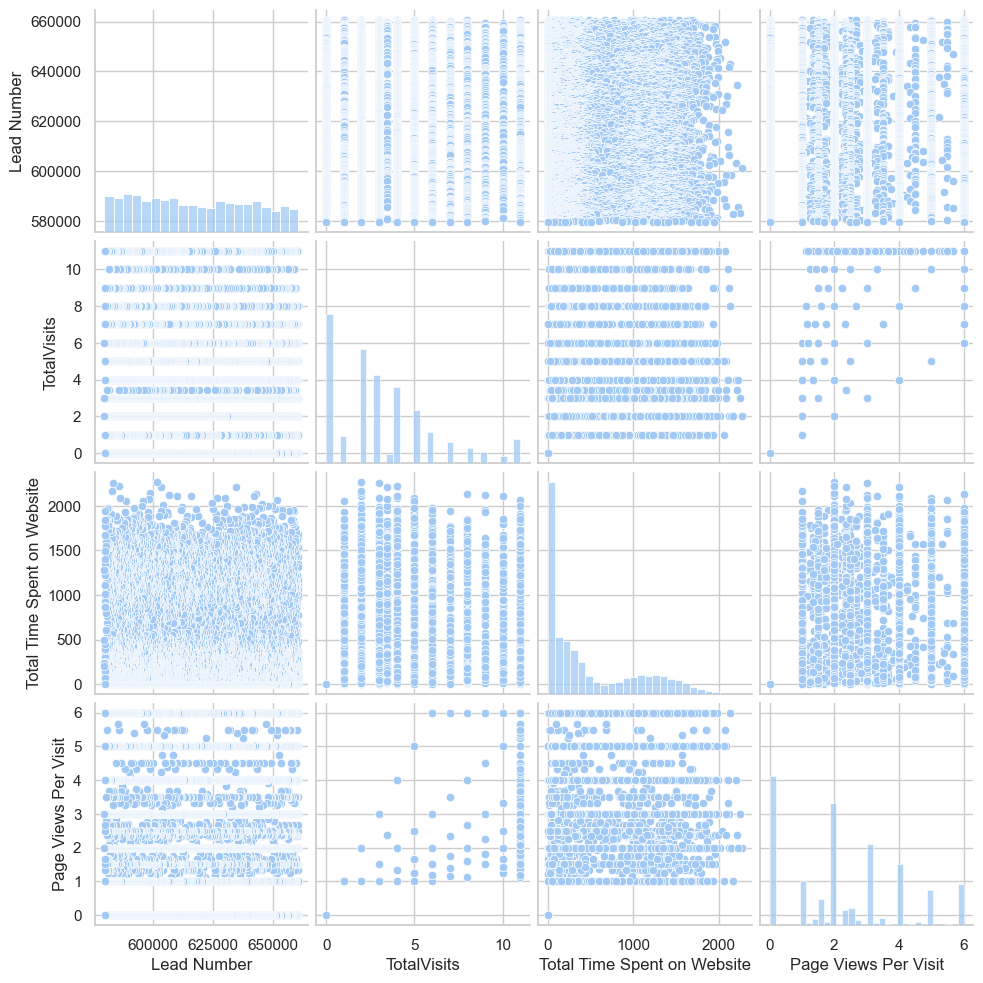

In [28]:
## Step 4.7 Multivariate Analysis
sns.pairplot(df[CONTINUOUS_NUM_COL])

# Show the plot
plt.show()

In [29]:
df[CAT_COLS].shape

(9240, 18)

## Ovservations:
1. In the pair plot we can see the scatter plots between multiple independent numerical variables that follows some trend or has some correlation between them.


In [30]:
df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Search Magazine  \
0                   0.0  Page Visited on Website     No       No   
1                   2.5             Email Opened     No       No   
2                   2.0             Email Opened     No       No   
3                   1.0              Unreachable     No       No   
4                   1.0        Converted to Lead     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [31]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [32]:
df.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity  Search  Magazine  \
0                   0.0  Page Visited on Website       0         0   
1                   2.5             Email Opened       0         0   
2                   2.0             Email Opened       0         0   
3                   1.0              Unreachable       0         0   
4                   1.0        Converted to Lead       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [33]:
varlist2 = df.columns[df.dtypes=="object"]
varlist2

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], dtype='object')

In [34]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[varlist2], drop_first=True)
# Adding the results to the master dataframe
leads_df = pd.concat([df, dummy1], axis=1)

In [35]:
leads_df.shape

(9240, 80)

In [36]:
# Dropping the repeated variables
leads_df= leads_df.drop(varlist2,1)
leads_df.shape

(9240, 76)

In [37]:
leads_df.dtypes

Lead Number                                             int64
Do Not Email                                            int64
Do Not Call                                             int64
Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
Page Views Per Visit                                  float64
Search                                                  int64
Magazine                                                int64
Newspaper Article                                       int64
X Education Forums                                      int64
Newspaper                                               int64
Digital Advertisement                                   int64
Through Recommendations                                 int64
Receive More Updates About Our Courses                  int64
Update me on Supply Chain Content                       int64
Get upda

## Test-Train Split

In [38]:
# Import the required library
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = leads_df.drop(["Lead Number","Converted"],axis= 1)
# Putting response variable to y
y = leads_df['Converted']
X_train, X_test, y_train,y_test = train_test_split (X,y,train_size=0.7,test_size=0.3, random_state=100)

In [39]:
# Step 5: Feature Scaling
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()


X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -1.124680                    -0.885371   
6795             0            0     0.272833                     0.005716   
3516             0            0     0.622211                    -0.691418   
8105             0            0     0.622211                     1.365219   
3934             0            0    -1.124680                    -0.885371   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
1871             -1.269958       0         0                  0   
6795             -0.519633       0         0                  0   
3516              0.140427       0         0                  0   
8105              1.550812       0         0                  0   
3934             -1.269958       0         0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
1871                   0          0                      0   
6795                   0          0                      0   
3516                   0          0                      0   
8105                   0          0                      0   
3934                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
1871                        0                                       0   
6795                        0                                       0   
3516                        0                                       0   
8105                        0                                       0   
3934                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
1871                                  0                          0   
6795                                  0                          0   
3516                                  0                          0   
8105                                  0                          0   
3934                                  0                          0   

      I agree to pay the amount through cheque  \
1871                                         0   
6795                                         0   
3516                                         0   
8105                                         0   
3934                                         0   

      A free copy of Mastering The Interview  \
1871                                       0   
6795                                       1   
3516                                       0   
8105                                       0   
3934                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Empty  Lead Source_Facebook  \
1871                           0                  0                     0   
6795                           1                  0                     0   
3516                           0                  0                     0   
8105                           0                  0                     0   
3934                           0                  0                     0   

      Lead Source_Google  Lead Source_Live Chat  Lead 

# Model Building

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)              # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [43]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False])

In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Search', False, 44),
 ('Magazine', False, 58),
 ('Newspaper Article', False, 39),
 ('X Education Forums', False, 30),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 2),
 ('Receive More Updates About Our Courses', False, 54),
 ('Update me on Supply Chain Content', False, 55),
 ('Get updates on DM Content', False, 56),
 ('I agree to pay the amount through cheque', False, 57),
 ('A free copy of Mastering The Interview', False, 51),
 ('Lead Origin_Landing Page Submission', False, 48),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Origin_Quick Add Form', False, 15),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Empty', False, 32),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 22),
 ('Lead Sour

In [45]:
col = X_train.columns[rfe.support_]

In [46]:
X_train = X_train[col] # selecting columns from RFE selected 15 features

In [47]:
# Assessing the model with StatsModels

In [48]:
import statsmodels.api as sm

In [49]:
# Model - 1

In [50]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.5
Date:                Fri, 05 Apr 2024   Deviance:                       5715.0
Time:                        00:20:53   Pearson chi2:                 6.60e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3597
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1718      0.107    -10.952      0.000      -1.381      -0.962
Do Not Email                                      -1.1174      0.165     -6.756      0.000      -1.442      -0.793
Total Time Spent on Website                        1.1277      0.039     29.238      0.000       1.052       1.203
Lead Origin_Lead Add Form                          3.1817      0.487      6.535      0.000       2.227       4.136
Lead Source_Olark Chat                             1.0341      0.096     10.744      0.000       0.845       1.223
Lead Source_Reference                              0.9275      0.519      1.787      0.074      -0.090       1.945
Lead Source_Welingak Website                       2.3456      0.867      2.706      0.007       0.646       4.045
Last Activity_Email Opened                         1.0680      0.148      7.208      0.000       0.778       1.358
Last Activity_Email Received                      21.2694   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Activity_Had a Phone Conversation             2.0245      0.860      2.354      0.019       0.339       3.710
Last Activity_SMS Sent                             1.4144      0.105     13.421      0.000       1.208       1.621
Last Notable Activity_Email Opened                -0.9507      0.170     -5.608      0.000      -1.283      -0.618
Last Notable Activity_Had a Phone Conversation     1.4577      1.388      1.050      0.294      -1.262       4.178
Last Notable Activity_Modified                    -1.2220      0.105    -11.693      0.000      -1.427      -1.017
Last Notable Activity_Olark Chat Conversation     -1.2347      0.325     -3.793      0.000      -1.873      -0.597
Last Notable Activity_Unreachable                  1.7169      0.509      3.372      0.001       0.719       2.715
==================================================================================================================
"""

In [51]:
# The p-value of some variables are more than 0.05.
# We will check vif and then proceed for variable elimination.

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                        Lead Origin_Lead Add Form  15.79
4                            Lead Source_Reference  12.88
6                       Last Activity_Email Opened   7.14
10              Last Notable Activity_Email Opened   6.97
5                     Lead Source_Welingak Website   3.77
8           Last Activity_Had a Phone Conversation   2.02
11  Last Notable Activity_Had a Phone Conversation   2.01
12                  Last Notable Activity_Modified   1.55
3                           Lead Source_Olark Chat   1.48
1                      Total Time Spent on Website   1.22
9                           Last Activity_SMS Sent   1.18
0                                     Do Not Email   1.11
13   Last Notable Activity_Olark Chat Conversation   1.06
7                     Last Activity_Email Received   1.00
14               Last Notable Activity_Unreachable   1.00

In [54]:
# VIF score is also high. First we will remove p values. then will check for VIF.
# Let's remove "Last Activity_Email Received" then re-built the model again.

In [55]:
# Model - 2

In [56]:
X_train.drop('Last Activity_Email Received', axis = 1, inplace = True)

In [57]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.7
Date:                Fri, 05 Apr 2024   Deviance:                       5719.5
Time:                        00:20:54   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3592
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1622      0.107    -10.888      0.000      -1.371      -0.953
Do Not Email                                      -1.1221      0.165     -6.786      0.000      -1.446      -0.798
Total Time Spent on Website                        1.1285      0.039     29.261      0.000       1.053       1.204
Lead Origin_Lead Add Form                          3.1806      0.487      6.535      0.000       2.227       4.135
Lead Source_Olark Chat                             1.0325      0.096     10.731      0.000       0.844       1.221
Lead Source_Reference                              0.9271      0.519      1.787      0.074      -0.090       1.944
Lead Source_Welingak Website                       2.3457      0.867      2.706      0.007       0.647       4.045
Last Activity_Email Opened                         1.0610      0.148      7.165      0.000       0.771       1.351
Last Activity_Had a Phone Conversation             2.0171      0.860      2.345      0.019       0.331       3.703
Last Activity_SMS Sent                             1.4059      0.105     13.363      0.000       1.200       1.612
Last Notable Activity_Email Opened                -0.9530      0.169     -5.624      0.000      -1.285      -0.621
Last Notable Activity_Had a Phone Conversation     1.4559      1.388      1.049      0.294      -1.264       4.176
Last Notable Activity_Modified                    -1.2242      0.104    -11.727      0.000      -1.429      -1.020
Last Notable Activity_Olark Chat Conversation     -1.2431      0.325     -3.819      0.000      -1.881      -0.605
Last Notable Activity_Unreachable                  1.7079      0.509      3.355      0.001       0.710       2.706
==================================================================================================================
"""

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                        Lead Origin_Lead Add Form  15.79
4                            Lead Source_Reference  12.88
6                       Last Activity_Email Opened   7.14
9               Last Notable Activity_Email Opened   6.97
5                     Lead Source_Welingak Website   3.77
7           Last Activity_Had a Phone Conversation   2.02
10  Last Notable Activity_Had a Phone Conversation   2.01
11                  Last Notable Activity_Modified   1.55
3                           Lead Source_Olark Chat   1.48
1                      Total Time Spent on Website   1.22
8                           Last Activity_SMS Sent   1.18
0                                     Do Not Email   1.11
12   Last Notable Activity_Olark Chat Conversation   1.06
13               Last Notable Activity_Unreachable   1.00

In [59]:
# p values are still not OK.
# Let's remove "Lead Source_Reference" then re-built the model again.

In [60]:
# Model - 3

In [61]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [62]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.2
Date:                Fri, 05 Apr 2024   Deviance:                       5722.3
Time:                        00:20:54   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3589
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1629      0.107    -10.894      0.000      -1.372      -0.954
Do Not Email                                      -1.1519      0.166     -6.950      0.000      -1.477      -0.827
Total Time Spent on Website                        1.1282      0.039     29.253      0.000       1.053       1.204
Lead Origin_Lead Add Form                          4.0069      0.184     21.819      0.000       3.647       4.367
Lead Source_Olark Chat                             1.0309      0.096     10.712      0.000       0.842       1.220
Lead Source_Welingak Website                       1.5218      0.741      2.053      0.040       0.069       2.975
Last Activity_Email Opened                         1.0623      0.148      7.183      0.000       0.772       1.352
Last Activity_Had a Phone Conversation             2.0291      0.858      2.365      0.018       0.348       3.711
Last Activity_SMS Sent                             1.4071      0.105     13.373      0.000       1.201       1.613
Last Notable Activity_Email Opened                -0.9517      0.169     -5.621      0.000      -1.284      -0.620
Last Notable Activity_Had a Phone Conversation     1.4445      1.386      1.042      0.297      -1.273       4.162
Last Notable Activity_Modified                    -1.2216      0.104    -11.702      0.000      -1.426      -1.017
Last Notable Activity_Olark Chat Conversation     -1.2381      0.325     -3.809      0.000      -1.875      -0.601
Last Notable Activity_Unreachable                  1.7104      0.509      3.359      0.001       0.712       2.708
==================================================================================================================
"""

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                       Last Activity_Email Opened  7.14
8               Last Notable Activity_Email Opened  6.97
6           Last Activity_Had a Phone Conversation  2.02
9   Last Notable Activity_Had a Phone Conversation  2.01
10                  Last Notable Activity_Modified  1.55
3                           Lead Source_Olark Chat  1.48
2                        Lead Origin_Lead Add Form  1.37
1                      Total Time Spent on Website  1.22
4                     Lead Source_Welingak Website  1.22
7                           Last Activity_SMS Sent  1.18
0                                     Do Not Email  1.11
11   Last Notable Activity_Olark Chat Conversation  1.06
12               Last Notable Activity_Unreachable  1.00

In [64]:
# The p values are still not OK. # Let's remove "Last Notable Activity_Had a Phone Conversation" then re-built the model again.

In [65]:
# Model - 4

In [66]:
X_train.drop("Last Notable Activity_Had a Phone Conversation", axis = 1, inplace = True)

In [67]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.8
Date:                Fri, 05 Apr 2024   Deviance:                       5723.5
Time:                        00:20:55   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3588
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1561      0.106    -10.856      0.000      -1.365      -0.947
Do Not Email                                     -1.1544      0.166     -6.969      0.000      -1.479      -0.830
Total Time Spent on Website                       1.1272      0.039     29.244      0.000       1.052       1.203
Lead Origin_Lead Add Form                         4.0043      0.184     21.802      0.000       3.644       4.364
Lead Source_Olark Chat                            1.0297      0.096     10.701      0.000       0.841       1.218
Lead Source_Welingak Website                      1.5244      0.741      2.056      0.040       0.072       2.977
Last Activity_Email Opened                        1.0649      0.148      7.201      0.000       0.775       1.355
Last Activity_Had a Phone Conversation            2.7041      0.646      4.184      0.000       1.437       3.971
Last Activity_SMS Sent                            1.4026      0.105     13.345      0.000       1.197       1.609
Last Notable Activity_Email Opened               -0.9606      0.169     -5.681      0.000      -1.292      -0.629
Last Notable Activity_Modified                   -1.2303      0.104    -11.821      0.000      -1.434      -1.026
Last Notable Activity_Olark Chat Conversation    -1.2439      0.325     -3.828      0.000      -1.881      -0.607
Last Notable Activity_Unreachable                 1.7036      0.509      3.347      0.001       0.706       2.701
=================================================================================================================
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5                      Last Activity_Email Opened  7.14
8              Last Notable Activity_Email Opened  6.96
9                  Last Notable Activity_Modified  1.54
3                          Lead Source_Olark Chat  1.48
2                       Lead Origin_Lead Add Form  1.37
1                     Total Time Spent on Website  1.22
4                    Lead Source_Welingak Website  1.22
7                          Last Activity_SMS Sent  1.18
0                                    Do Not Email  1.11
10  Last Notable Activity_Olark Chat Conversation  1.06
6          Last Activity_Had a Phone Conversation  1.01
11              Last Notable Activity_Unreachable  1.00

In [69]:
# now the p-values are fine and but VIF is above 5.
# Let's remove "Last Activity_Email Opened" then re-built the model again.

In [70]:
# Model - 5

In [71]:
X_train.drop("Last Activity_Email Opened", axis = 1, inplace = True)

In [72]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.7
Date:                Fri, 05 Apr 2024   Deviance:                       5773.5
Time:                        00:20:55   Pearson chi2:                 6.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3539
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0065      0.102     -9.825      0.000      -1.207      -0.806
Do Not Email                                     -1.2836      0.163     -7.865      0.000      -1.603      -0.964
Total Time Spent on Website                       1.1292      0.038     29.391      0.000       1.054       1.204
Lead Origin_Lead Add Form                         4.0305      0.184     21.864      0.000       3.669       4.392
Lead Source_Olark Chat                            1.0107      0.096     10.557      0.000       0.823       1.198
Lead Source_Welingak Website                      1.4940      0.741      2.015      0.044       0.041       2.947
Last Activity_Had a Phone Conversation            2.4935      0.647      3.854      0.000       1.226       3.761
Last Activity_SMS Sent                            1.2310      0.100     12.263      0.000       1.034       1.428
Last Notable Activity_Email Opened               -0.0426      0.113     -0.377      0.706      -0.264       0.179
Last Notable Activity_Modified                   -1.0780      0.100    -10.784      0.000      -1.274      -0.882
Last Notable Activity_Olark Chat Conversation    -1.3798      0.324     -4.257      0.000      -2.015      -0.744
Last Notable Activity_Unreachable                 1.5610      0.509      3.066      0.002       0.563       2.559
=================================================================================================================
"""

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                          Lead Source_Olark Chat  1.48
2                       Lead Origin_Lead Add Form  1.37
8                  Last Notable Activity_Modified  1.28
1                     Total Time Spent on Website  1.22
4                    Lead Source_Welingak Website  1.22
6                          Last Activity_SMS Sent  1.17
0                                    Do Not Email  1.09
7              Last Notable Activity_Email Opened  1.09
9   Last Notable Activity_Olark Chat Conversation  1.06
5          Last Activity_Had a Phone Conversation  1.01
10              Last Notable Activity_Unreachable  1.00

In [74]:
# now the VIFs are fine and but p value is above 0.05.
# Let's remove "Last Activity_Email Opened" then re-built the model again.

In [75]:
X_train.drop("Last Notable Activity_Email Opened", axis = 1, inplace = True)

In [76]:
# Model - 6

In [77]:
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.8
Date:                Fri, 05 Apr 2024   Deviance:                       5773.6
Time:                        00:20:56   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3538
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0395      0.053    -19.437      0.000      -1.144      -0.935
Do Not Email                                     -1.2729      0.161     -7.918      0.000      -1.588      -0.958
Total Time Spent on Website                       1.1292      0.038     29.391      0.000       1.054       1.205
Lead Origin_Lead Add Form                         4.0306      0.184     21.861      0.000       3.669       4.392
Lead Source_Olark Chat                            1.0124      0.096     10.587      0.000       0.825       1.200
Lead Source_Welingak Website                      1.4927      0.741      2.013      0.044       0.039       2.946
Last Activity_Had a Phone Conversation            2.5151      0.644      3.905      0.000       1.253       3.777
Last Activity_SMS Sent                            1.2579      0.071     17.822      0.000       1.120       1.396
Last Notable Activity_Modified                   -1.0530      0.075    -14.083      0.000      -1.200      -0.906
Last Notable Activity_Olark Chat Conversation    -1.3480      0.313     -4.306      0.000      -1.962      -0.735
Last Notable Activity_Unreachable                 1.5935      0.502      3.176      0.001       0.610       2.577
=================================================================================================================
"""

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                         Lead Source_Olark Chat  1.38
2                      Lead Origin_Lead Add Form  1.34
7                 Last Notable Activity_Modified  1.26
4                   Lead Source_Welingak Website  1.22
1                    Total Time Spent on Website  1.20
6                         Last Activity_SMS Sent  1.16
0                                   Do Not Email  1.09
8  Last Notable Activity_Olark Chat Conversation  1.06
5         Last Activity_Had a Phone Conversation  1.01
9              Last Notable Activity_Unreachable  1.00

In [79]:
# both VIF and p values are fine. We will proceed with model 6

In [80]:
coefficient = res.params

In [81]:
coefficient.sort_values(ascending=False)

Lead Origin_Lead Add Form                        4.030583
Last Activity_Had a Phone Conversation           2.515072
Last Notable Activity_Unreachable                1.593489
Lead Source_Welingak Website                     1.492700
Last Activity_SMS Sent                           1.257912
Total Time Spent on Website                      1.129247
Lead Source_Olark Chat                           1.012375
const                                           -1.039458
Last Notable Activity_Modified                  -1.053027
Do Not Email                                    -1.272932
Last Notable Activity_Olark Chat Conversation   -1.348036
dtype: float64

In [82]:
X_train.shape

(6468, 10)

In [83]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.263688
6795    0.262502
3516    0.308346
8105    0.853225
3934    0.111065
4844    0.910694
3297    0.134280
8071    0.984601
987     0.196502
7423    0.920428
dtype: float64

In [84]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26368848, 0.26250244, 0.30834592, 0.85322524, 0.11106463,
       0.91069424, 0.1342805 , 0.98460131, 0.19650175, 0.92042838])

In [85]:
# Creating a dataframe with the actual convertion and the predicted probabilities

In [86]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Pred_prob':y_train_pred})
y_train_pred_final.head()

Converted  Pred_prob
0          0   0.263688
1          0   0.262502
2          0   0.308346
3          0   0.853225
4          0   0.111065

In [87]:
# Creating new column 'predicted' with 1 if Pred_prob > 0.5 else 0

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Pred_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Pred_prob  predicted
0          0   0.263688          0
1          0   0.262502          0
2          0   0.308346          0
3          0   0.853225          1
4          0   0.111065          0

In [89]:
from sklearn import metrics

In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3508  494]
 [ 807 1659]]


In [91]:
# Predicted     Cold_lead    Hot_lead
# Actual
# Cold_lead         3508      494
# Hot_lead          807       1659  

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7988559059987631


In [94]:
# 79.88 % accuracy. It's preety good score.

### Step 9: Plotting the ROC Curve
### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Pred_prob, drop_intermediate = False )

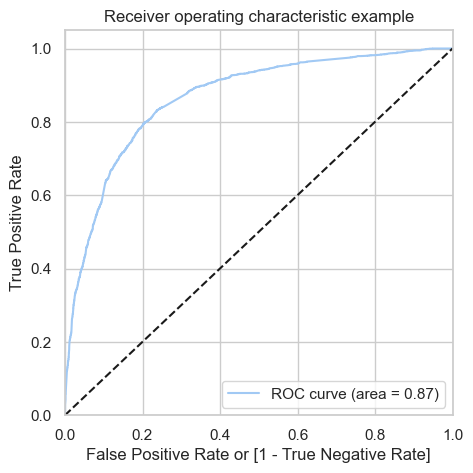

In [97]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Pred_prob)

In [98]:
## Now we have to decide the Optimal Cutoff Point based upon Sensitivity- Specificity OR Recall- Precision

## As per the business need if the model predicts " a cold lead to be a hot lead" , the marketing team will boost their effort
## to convert it. But the whole effort (cost) will go in vain.
## but if the model prdecits " an acutal hot lead a cold lead" , It will not have any effect in the cost of the company as
##  the hot lead anyway going to convert to  revenue.

In [99]:
## as per the above discusion we can conclude that False positive (" a cold lead to be a hot lead")
## is more important than the False negative (" an acutal hot lead a cold lead") ones.
## If we reduce the Wrong 445 hot lead prediction, we will overcome the business problem. So it is a Recall- Precision problem.

In [100]:
## Precision and Recall

In [101]:
from sklearn.metrics import precision_score, recall_score

In [102]:
print("Precision_Score = ",precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("recall_score = ", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision_Score =  0.770552717138876
recall_score =  0.6727493917274939


In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Pred_prob)

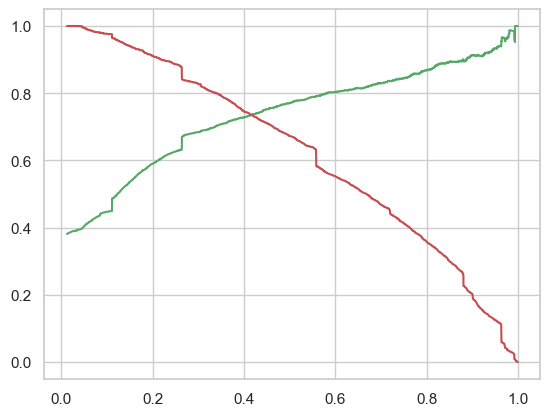

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [107]:
# As per the above graph we can see the optimal value for cut-off is near around 0.42.

In [108]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Pred_prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

Converted  Pred_prob  predicted  final_predicted
0          0   0.263688          0                0
1          0   0.262502          0                0
2          0   0.308346          0                0
3          0   0.853225          1                1
4          0   0.111065          0                0

In [109]:
#Lead_Score = "Pred_prob" * 100
y_train_pred_final['Lead_score'] = y_train_pred_final["Pred_prob"]*100

In [110]:
#Lead_type :Hot lead OR Cold_lead based upon the cutoff lead score of 42
y_train_pred_final['Lead_type'] = y_train_pred_final["Lead_score"].map(lambda x: "Hot_lead" if x > 42 else "Cold_lead")

In [111]:
y_train_pred_final

Converted  Pred_prob  predicted  final_predicted  Lead_score  Lead_type
0             0   0.263688          0                0   26.368848  Cold_lead
1             0   0.262502          0                0   26.250244  Cold_lead
2             0   0.308346          0                0   30.834592  Cold_lead
3             0   0.853225          1                1   85.322524   Hot_lead
4             0   0.111065          0                0   11.106463  Cold_lead
...         ...        ...        ...              ...         ...        ...
6463          1   0.879883          1                1   87.988300   Hot_lead
6464          1   0.916445          1                1   91.644471   Hot_lead
6465          1   0.263688          0                0   26.368848  Cold_lead
6466          0   0.069105          0                0    6.910477  Cold_lead
6467          0   0.111065          0                0   11.106463  Cold_lead

[6468 rows x 6 columns]

In [112]:
# Accuracy
print("Train_Accuracy = ",round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2))

Train_Accuracy =  79.85


In [113]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3359,  643],
       [ 660, 1806]], dtype=int64)

In [114]:
# Predicted     Cold_lead    Hot_lead
# Actual
# Cold_lead         3359      643
# Hot_lead          660       1806  

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
print("Precision_Score = ",precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("recall_score = ", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision_Score =  0.770552717138876
recall_score =  0.6727493917274939


In [117]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7374438546345448

In [118]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.732360097323601

# Making predictions on the test set

In [119]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4269             0            0     1.668329                     0.933036   
2376             0            0    -1.132961                    -0.900812   
7766             0            0     0.617845                    -0.793792   
9199             0            0    -1.132961                    -0.900812   
4359             0            0    -1.132961                    -0.900812   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
4269              2.071990       0         0                  0   
2376             -1.272105       0         0                  0   
7766              1.514641       0         0                  0   
9199             -1.272105       0         0                  0   
4359             -1.272105       0         0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
4269                   0          0                      0   
2376                   0          0                      0   
7766                   0          0                      0   
9199                   0          0                      0   
4359                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
4269                        0                                       0   
2376                        0                                       0   
7766                        0                                       0   
9199                        0                                       0   
4359                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
4269                                  0                          0   
2376                                  0                          0   
7766                                  0                          0   
9199                                  0                          0   
4359                                  0                          0   

      I agree to pay the amount through cheque  \
4269                                         0   
2376                                         0   
7766                                         0   
9199                                         0   
4359                                         0   

      A free copy of Mastering The Interview  \
4269                                       0   
2376                                       0   
7766                                       0   
9199                                       0   
4359                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
4269                        0                           0   
2376                        0                           0   
7766                        0                           0   
9199                        0                           0   
4359                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Empty  Lead Source_Facebook  \
4269                           1                  0                     0   
2376                           0                  0                     0   
7766                           0                  0                     0   
9199                           0                  0                     0   
4359                           0                  0                     0   

      Lead Source_Google  Lead Source_Live Chat  Lead 

In [120]:
X_test.shape

(2772, 74)

In [121]:
X_test = X_test[col]
X_test = X_test.drop(['Last Activity_Email Received','Lead Source_Reference',
                      "Last Notable Activity_Had a Phone Conversation","Last Activity_Email Opened",
                      "Last Notable Activity_Email Opened"],axis=1)
X_test.shape

(2772, 10)

In [122]:
X_test_sm = sm.add_constant(X_test)

In [123]:
y_test_pred = res.predict(X_test_sm)

In [124]:
y_test_pred[:10]

4269    0.781099
2376    0.962014
7766    0.415237
9199    0.109355
4359    0.878028
9186    0.611779
1631    0.504567
8963    0.181274
8007    0.082785
5324    0.384368
dtype: float64

In [125]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [126]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Pred_prob'})

In [130]:
y_pred_final.head()

Converted  Pred_prob
0          1   0.781099
1          1   0.962014
2          1   0.415237
3          0   0.109355
4          1   0.878028

In [131]:
# Making prediction using cut off 0.42
y_pred_final["final_predicted"] = y_pred_final.Pred_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

Converted  Pred_prob  final_predicted
0          1   0.781099                1
1          1   0.962014                1
2          1   0.415237                0
3          0   0.109355                0
4          1   0.878028                1

In [132]:
#Lead_Score = "Pred_prob" * 100
y_pred_final['Lead_score'] = y_pred_final["Pred_prob"]*100
y_pred_final

Converted  Pred_prob  final_predicted  Lead_score
0             1   0.781099                1   78.109915
1             1   0.962014                1   96.201352
2             1   0.415237                0   41.523722
3             0   0.109355                0   10.935478
4             1   0.878028                1   87.802792
...         ...        ...              ...         ...
2767          0   0.188058                0   18.805788
2768          1   0.962014                1   96.201352
2769          0   0.260317                0   26.031705
2770          0   0.251820                0   25.181957
2771          1   0.962014                1   96.201352

[2772 rows x 4 columns]

In [133]:
#Lead_type :Hot lead OR Cold_lead based upon the cutoff lead score of 42
y_pred_final['Lead_type'] = y_pred_final["Lead_score"].map(lambda x: "Hot_lead" if x > 42 else "Cold_lead")

In [134]:
y_pred_final

Converted  Pred_prob  final_predicted  Lead_score  Lead_type
0             1   0.781099                1   78.109915   Hot_lead
1             1   0.962014                1   96.201352   Hot_lead
2             1   0.415237                0   41.523722  Cold_lead
3             0   0.109355                0   10.935478  Cold_lead
4             1   0.878028                1   87.802792   Hot_lead
...         ...        ...              ...         ...        ...
2767          0   0.188058                0   18.805788  Cold_lead
2768          1   0.962014                1   96.201352   Hot_lead
2769          0   0.260317                0   26.031705  Cold_lead
2770          0   0.251820                0   25.181957  Cold_lead
2771          1   0.962014                1   96.201352   Hot_lead

[2772 rows x 5 columns]

In [135]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8066378066378066

In [136]:
# Creating confusion matrix 
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[1435,  242],
       [ 294,  801]], dtype=int64)

In [137]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

# Precision = TP / TP + FP
print(TP / (TP + FP))

#Recall = TP / TP + FN
print(TP / (TP + FN))

0.7679769894534996
0.7315068493150685


In [138]:
print("Precision_Score = ",precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("recall_score = ", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision_Score =  0.770552717138876
recall_score =  0.6727493917274939
